<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Descriptive Statistic Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

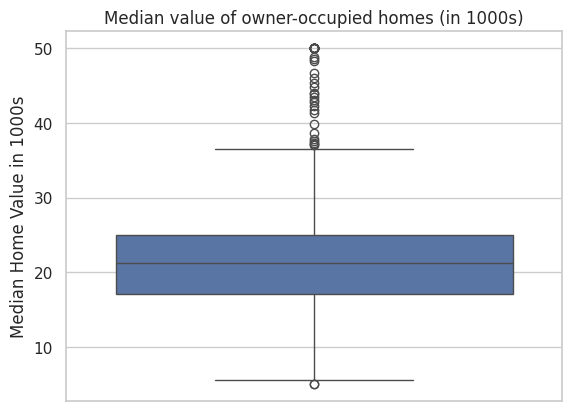

In [18]:
sns.set(style="whitegrid")
sns.boxplot(y='MEDV', data=boston_df).set(title='Median value of owner-occupied homes (in 1000s)')
pyplot.ylabel('Median Home Value in 1000s')
pyplot.show()

#Task 2: Generate Descriptive Statistics and Visualizations - Part 1

#### Provide a  bar plot for the Charles river variable

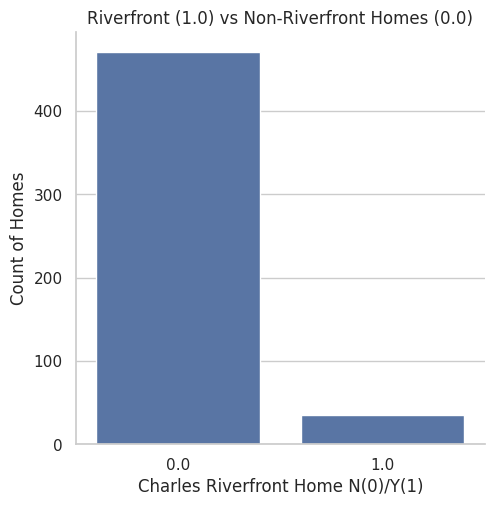

In [21]:
sns.set(style="whitegrid")
sns.catplot(x='CHAS', kind='count', data=boston_df).set(title='Riverfront (1.0) vs Non-Riverfront Homes (0.0)')
pyplot.xlabel('Charles Riverfront Home N(0)/Y(1)')
pyplot.ylabel('Count of Homes')
pyplot.show()

#Task 2: Generate Descriptive Statistics and Visualizations - Part 2

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

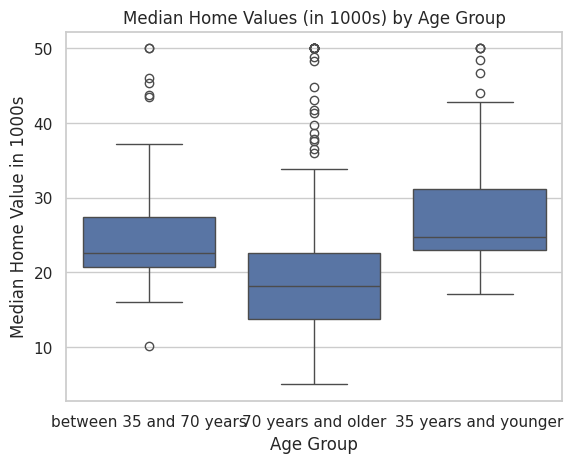

In [34]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x='age_group', y='MEDV', data=boston_df).set(title='Median Home Values (in 1000s) by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Home Value in 1000s')
pyplot.show()

#Task 2: Generate Descriptive Statistics and Visualizations - Part 3

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

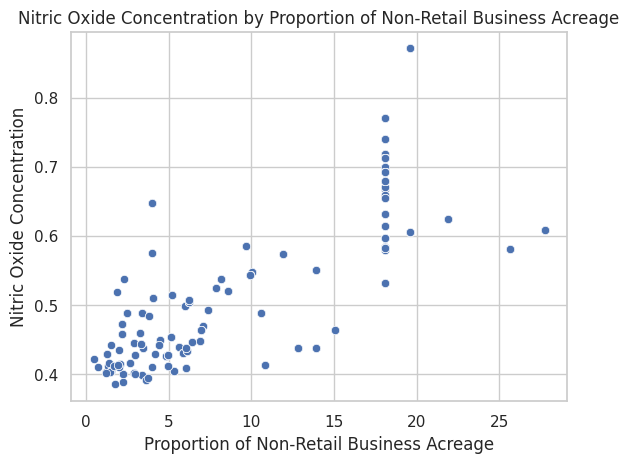

In [38]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(title='Nitric Oxide Concentration by Proportion of Non-Retail Business Acreage')
pyplot.xlabel('Proportion of Non-Retail Business Acreage')
pyplot.ylabel('Nitric Oxide Concentration')
pyplot.show()

#Task 2: Generate Descriptive Statistics and Visualizations - Part 4

#### Create a histogram for the pupil to teacher ratio variable

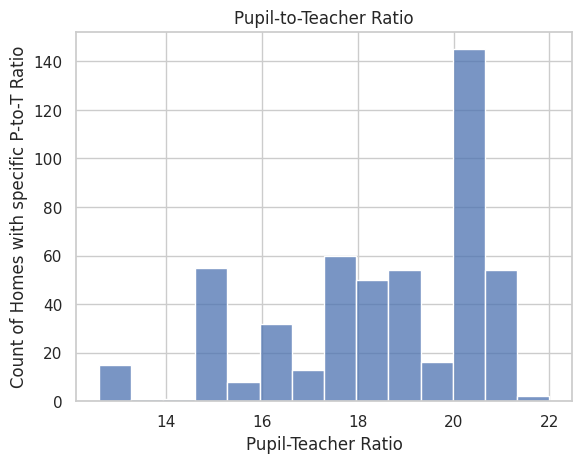

In [43]:
sns.histplot(boston_df['PTRATIO'], kde = False).set(title='Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Count of Homes with specific P-to-T Ratio')
pyplot.show()

#Task 2: Generate Descriptive Statistics and Visualizations - Part 5

## Statistical Tests and Regression

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H_0 = No difference in median home value whether bounded by Charles River or not n\
H_1 = Statistically significant difference in median home value if bounded by Charles River

In [48]:
X = boston_df['CHAS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.39e-05
Time:                        21:35:02   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **The result of the test is that H_0 is rejected at α = 0.05 as the p-value is < α, meaning there is a statistically significant difference in median value when a home is bounded by the Charles River.**

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H_0 = There is no difference in the median home value between the 3 age groups n\
H_1 = At least one age group has a statistically significantly different median home value

In [50]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


#### **The result of the test is that H_0 is rejected at α = 0.05 as the p-value is < α. This means that at least one of the age groups has a statistically significantly different median home value.**

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [52]:
X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 11 May 2024   Prob (F-statistic):           7.91e-98
Time:                        21:56:50   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **The Pearson Correlation Coefficient (PCC) for INDUS-NOX is R = 0.764. A PCC > 0.7 indicates a strong linear relationship between two variables. Based on the PCC of 0.764 > 0.7, we cannot conclude that there is no relationship between nitric oxide concentration and proportion of non-retail business acreage.**

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [53]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 11 May 2024   Prob (F-statistic):           1.21e-08
Time:                        22:04:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **For every 1 unit change in DIS (weighted distances to five Boston employment centres) there is a 1.0916 unit change in MEDV (Median value of owner-occupied homes in 1000's). Assuming DIS is measured in miles, this means that for every additional mile in distance to the five Boston employment centers, the median value of a home increases by $1,091.60**